# 5.1 什么是机器学习

## 5.1.1 机器学习的分类

## 5.1.2 机器学习应用的定性示例

## 5.1.3 小结

有监督学习：
- 分类
- 回复

无监督学习：
- 聚类
- 降维

# 5.2 Scikit-Learn简介

## 5.2.1 Scikit-Learn的数据表示

1. 数据表

In [3]:
import seaborn as sns

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. 特征矩阵

3. 目标数组

知道目标数组之后，就可以用Seaborn对数据进行可视化

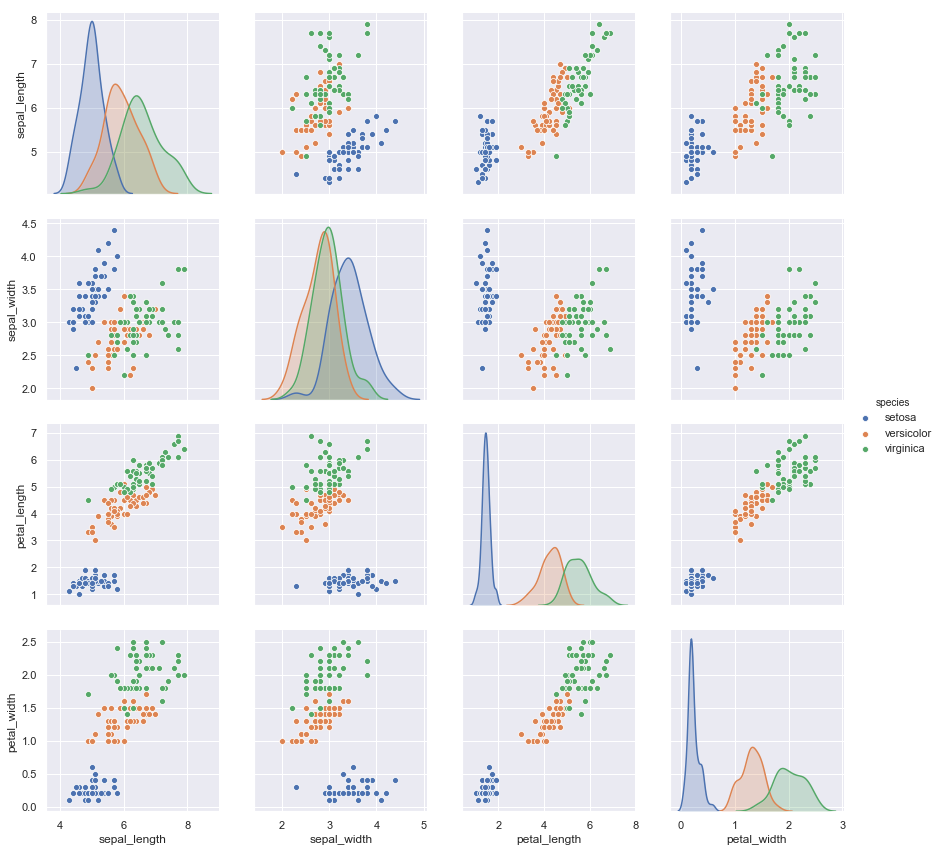

In [9]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(iris, hue='species', height=3)

In [10]:
x_iris = iris.drop('species', axis=1)

In [12]:
x_iris.shape

(150, 4)

In [13]:
y_iris = iris['species']

In [14]:
y_iris.shape

(150,)

## 5.2.2 Scikit-Learn的评估器API

1. API基础知识

2. 有监督学习示例：简单线性回归

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
rng = np.random.RandomState(42)

In [17]:
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

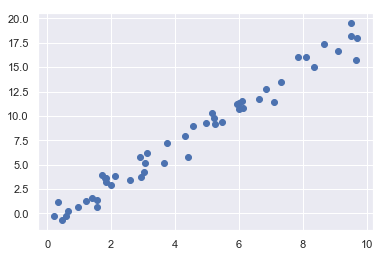

In [18]:
plt.scatter(x, y)

（1） 选择模型类

In [19]:
from sklearn.linear_model import LinearRegression

（2） 选择模型超参数

实例化LinearRegression类并用fit_intercept超参数设置是否想要拟合直线的截距

In [20]:
model = LinearRegression(fit_intercept=True)

In [21]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

（3） 将数据整理成特征矩阵和目标数组

In [24]:
X = x[:, np.newaxis]

In [25]:
X.shape

(50, 1)

（4） 用模型拟合数据

In [26]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

模型参数如下：

In [27]:
model.coef_

array([1.9776566])

In [28]:
model.intercept_

-0.903310725531111

（5） 预测新数据的标签

In [29]:
xfit = np.linspace(-1, 11)

In [31]:
xfit = xfit[:, np.newaxis]

In [32]:
yfit = model.predict(xfit)

In [33]:
yfit

array([-2.88096733, -2.39664326, -1.9123192 , -1.42799513, -0.94367106,
       -0.459347  ,  0.02497707,  0.50930113,  0.9936252 ,  1.47794926,
        1.96227333,  2.44659739,  2.93092146,  3.41524552,  3.89956959,
        4.38389366,  4.86821772,  5.35254179,  5.83686585,  6.32118992,
        6.80551398,  7.28983805,  7.77416211,  8.25848618,  8.74281024,
        9.22713431,  9.71145837, 10.19578244, 10.68010651, 11.16443057,
       11.64875464, 12.1330787 , 12.61740277, 13.10172683, 13.5860509 ,
       14.07037496, 14.55469903, 15.03902309, 15.52334716, 16.00767122,
       16.49199529, 16.97631936, 17.46064342, 17.94496749, 18.42929155,
       18.91361562, 19.39793968, 19.88226375, 20.36658781, 20.85091188])

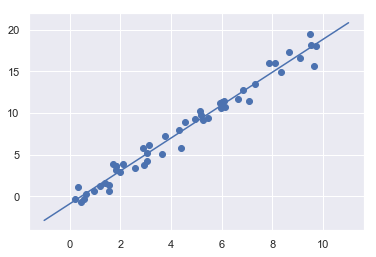

In [35]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

3. 有监督学习示例：鸢尾花数据分类

高斯朴素贝叶斯方法速度很快，而且不需要选择超参数，所以通常很合适作为初步分类手段，在借助更复杂的模型进行优化之前使用。

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state=1)

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
model = GaussianNB()

In [42]:
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_model = model.predict(xtest)

最后用accuracy_score工具验证模型预测结果的准确率

In [44]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(ytest, y_model)

0.9736842105263158

4. 无监督学习示例：鸢尾花数据降维